# --> Importations

To start this notebook you need to download the following files.

- full_numpy_bitmap_airplane.npy
- full_numpy_bitmap_book.npy
- full_numpy_bitmap_car.npy
- full_numpy_bitmap_dog.npy
- full_numpy_bitmap_face.npy
- full_numpy_bitmap_apple.npy
- full_numpy_bitmap_brain.npy
- full_numpy_bitmap_chair.npy
- full_numpy_bitmap_eye.npy
- full_numpy_bitmap_The Eiffel Tower.npy

Then you need to store the file at the root in ./Datasets/QuickDraw.<br>

Link : https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap/?pli=1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --> Import QuickDraw dataset

In [2]:
dataset_dir = "../../Datasets/QuickDraw/"
files = os.listdir(dataset_dir)
max_size_per_cl = 1500 #maximum d'image par type d'image dans le dataset
draw_class = []
size = 0

#Evaluation de la taille du dataset
for name in files:
    draws = np.load(os.path.join(dataset_dir, name))
    draws = draws[:max_size_per_cl]
    size += draws.shape[0]
    
#Buffer permettant de stocker les images et les targets
images = np.zeros((size, 28, 28))
targets = np.zeros((size, ))

#Itere dans la dataset et ajoute a la liste draw_class
it = 0
t = 0
for name in files:
    #Ouvre chaque dataset et creer une nouvelle classe avec un nom
    draw_class.append(name.replace("full_numpy_bitmap_", "").replace(".npy", ""))
    draws = np.load(os.path.join(dataset_dir, name))
    draws = draws[:max_size_per_cl]
    #Ajoute les images au buffers
    images[it:it+draws.shape[0]] = np.invert(draws.reshape(-1, 28, 28))
    targets[it:it+draws.shape[0]] = t
    #Itere sur chaque dataset
    it += draws.shape[0]
    t += 1
    
#Shuffle randomly
indexes = np.arange(size)
np.random.shuffle(indexes)
images = images[indexes]
targets = targets[indexes]

#Affichage de notre train set et validation set
images, images_valid, targets, targets_valid = train_test_split(images, targets, test_size=0.33)
print("Shape images : ", images.shape)
print("Shape targets : ", targets.shape)
print("\nShape valid images : ", images_valid.shape)
print("Shape valid targets : ", targets_valid.shape)
print("\nClasses possibles : ", draw_class)

Shape images :  (10050, 28, 28)
Shape targets :  (10050,)

Shape valid images :  (4950, 28, 28)
Shape valid targets :  (4950,)

Classes possibles :  ['airplane', 'apple', 'book', 'brain', 'car', 'chair', 'dog', 'eye', 'face', 'The Eiffel Tower']


# --> Exemple d'image affiche

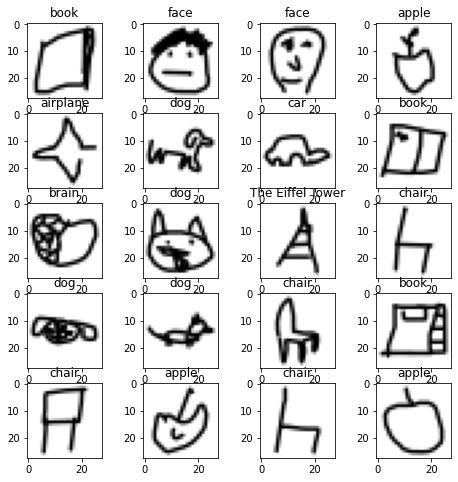

In [3]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
    index = np.random.randint(len(images))     #Index d'une image aleatoire
    img = images[index]                        #On recupere cette image
    fig.add_subplot(rows, columns, i)          #Ajout d'un nouveau graph 4*5
    plt.title(draw_class[int(targets[index])]) #Ajout d'un titre par plot
    plt.imshow(img, cmap="gray")               #Affichage de l'image en noir et blanc
plt.show()

# --> Normalization

In [9]:
print("Moyenne et ecart type du dataset : ", images.mean(), images.std())
scaler = StandardScaler()
scaled_images = scaler.fit_transform(images.reshape(-1, 28*28))
scaled_images_valid = scaler.transform(images_valid.reshape(-1, 28*28))
print("Moyenne et ecart type du dataset apres normalisation : ", scaled_images.mean(), scaled_images.std())

scaled_images = scaled_images.reshape(-1, 28, 28, 1)
scaled_images_valid = scaled_images_valid.reshape(-1, 28, 28, 1)

Moyenne et ecart type du dataset :  209.57425284292822 85.13858104915296
Moyenne et ecart type du dataset apres normalisation :  1.1063949025908109e-16 0.9285714285714265


# --> Utilisation de tf.data

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices(scaled_images)
valid_dataset = tf.data.Dataset.from_tensor_slices(scaled_images_valid)

#(10050, 28, 28, 1)
#10050 images, 28 par 28, 1 : niveau de gris
print("Shape of scaled_image : ", scaled_images.shape)

for item in train_dataset:
    print("Shape of train dataset items : ", item.shape)
    break

Shape of scaled_image :  (10050, 28, 28, 1)
Shape of train dataset items :  (28, 28, 1)


In [11]:
#Si on train le reseau sur tous le dataset, ici 10050 images on va avoir un probleme
#car il va falloir calculer le gradient avec enormement de data. Il faut donc separer
#nos data en plusieurs batch de differentes tailles.
epoch = 1
batch_size = 32
for batch_training in train_dataset.repeat(epoch).batch(32):
    #(32, 28, 28, 1)
    #32 : tailles du batch actuel pour le train, 28 par 28, 1 : niveau de gris
    print(batch_training.shape)
    break

(32, 28, 28, 1)
